## CIA World Factbook Analysis

<li>population - The population as of 2015.<p>
<li>population_growth - The annual population growth rate, as a percentage.<p>
<li>area - The total land and water area.<p>
<li>name - The name of the country.<p>
<li>area - The total land and sea area of the country.<p>
<li>population - The country's population.<p>
<li>population_growth- The country's population growth as a percentage.<p>
<li>birth_rate - The country's birth rate, or the number of births a year per 1,000 people.<p>
<li>death_rate - The country's death rate, or the number of death a year per 1,000 people.<p>
<li>area- The country's total area (both land and water).<p>
<li>area_land - The country's land area in square kilometers.<p>
<li>area_water - The country's waterarea in square kilometers.<p>

connect to a SQLite database and query it using the sqlite3 module.
1st variant with tuples in result

In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
q1 = "SELECT * FROM facts;"
cursor.execute(q1).fetchall()

[(1,
  'af',
  'Afghanistan',
  652230,
  652230,
  0,
  32564342,
  2.32,
  38.57,
  13.89,
  1.51),
 (2, 'al', 'Albania', 28748, 27398, 1350, 3029278, 0.3, 12.92, 6.58, 3.3),
 (3, 'ag', 'Algeria', 2381741, 2381741, 0, 39542166, 1.84, 23.67, 4.31, 0.92),
 (4, 'an', 'Andorra', 468, 468, 0, 85580, 0.12, 8.13, 6.96, 0.0),
 (5, 'ao', 'Angola', 1246700, 1246700, 0, 19625353, 2.78, 38.78, 11.49, 0.46),
 (6, 'ac', 'Antigua and Barbuda', 442, 442, 0, 92436, 1.24, 15.85, 5.69, 2.21),
 (7,
  'ar',
  'Argentina',
  2780400,
  2736690,
  43710,
  43431886,
  0.93,
  16.64,
  7.33,
  0.0),
 (8, 'am', 'Armenia', 29743, 28203, 1540, 3056382, 0.15, 13.61, 9.34, 5.8),
 (9,
  'as',
  'Australia',
  7741220,
  7682300,
  58920,
  22751014,
  1.07,
  12.15,
  7.14,
  5.65),
 (10, 'au', 'Austria', 83871, 82445, 1426, 8665550, 0.55, 9.41, 9.42, 5.56),
 (11, 'aj', 'Azerbaijan', 86600, 82629, 3971, 9780780, 0.96, 16.64, 7.07, 0.0),
 (12, 'bf', 'Bahamas, The', 13880, 10010, 3870, 324597, 0.85, 15.5, 7.05, 0.0

2nd variant - read the result in pandas dataframe

In [3]:
conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM facts;"
res1=pd.read_sql_query(q, conn)
q5="SELECT * FROM facts LIMIT 5;"
res2=pd.read_sql_query(q5, conn)

In [4]:
res2

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Single query that returns the: min&max population, population growth

In [5]:

q3 = "SELECT MIN(population),MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
res3=pd.read_sql_query(q3, conn)

In [6]:
res3

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


## Single query that returns the: min&max population, population growth

In [7]:
q4 = "SELECT * FROM facts where population =(SELECT MIN(population) FROM facts) ;"
res4=pd.read_sql_query(q4, conn)

In [8]:
res4

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [9]:
q5 = "SELECT * FROM facts where population =(SELECT MAX(population) FROM facts) ;"
res5=pd.read_sql_query(q5, conn)

In [10]:
res5

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


This cell contains country name:world & antarctica. Word with anomalously large value and Antarctica with zero number of population

In [11]:
q6 = "SELECT * FROM facts where population !=(SELECT MAX(population) FROM facts) and population !=(SELECT MIN(population) FROM facts) ;"
res6=pd.read_sql_query(q6, conn)
res6

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8665550,0.55,9.41,9.42,5.56


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([230.,   6.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([4.80000000e+01, 1.36748582e+08, 2.73497116e+08, 4.10245650e+08,
        5.46994184e+08, 6.83742718e+08, 8.20491252e+08, 9.57239786e+08,
        1.09398832e+09, 1.23073685e+09, 1.36748539e+09]),
 <a list of 10 Patch objects>)

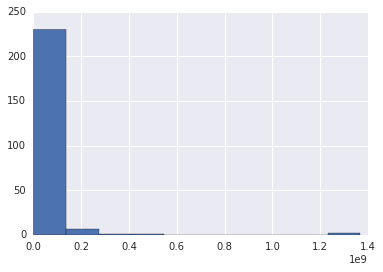

In [13]:
plt.hist(res6["population"])

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


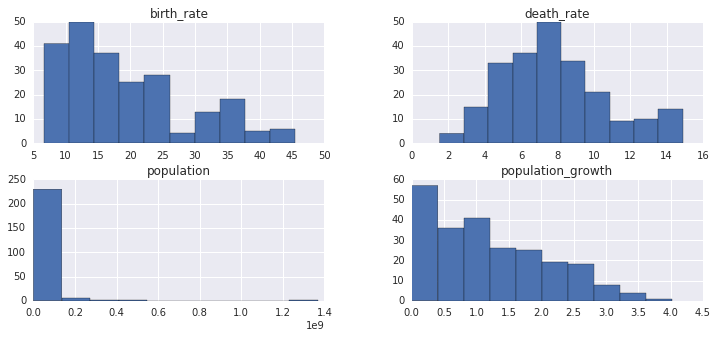

In [21]:
q7 = "SELECT population,population_growth,birth_rate,death_rate  FROM facts where population !=(SELECT MAX(population) FROM facts) and population !=(SELECT MIN(population) FROM facts) ;"
res7=pd.read_sql_query(q7, conn)
fig = plt.figure(figsize=(12, 5))
ax1=fig.add_subplot(1,4,1)
res7.hist(ax=ax1)
plt.show()

### Which countries have the highest population density?

In [37]:
q8 = "SELECT cast (population as float)/cast (area_land as float) density, name  FROM facts where population !=(SELECT MAX(population) FROM facts) and population !=(SELECT MIN(population) FROM facts) ORDER BY density DESC LIMIT 10;"
res8=pd.read_sql_query(q8, conn)
res8

,density,name
0,21168.964286,Macau
1,15267.500000,Monaco
2,8259.784571,Singapore
3,6655.271202,Hong Kong
4,5191.819444,Gaza Strip
5,4876.333333,Gibraltar
6,1771.859211,Bahrain
7,1319.640940,Maldives
8,1310.015823,Malta
9,1299.925926,Bermuda


#### Histogram of population densities

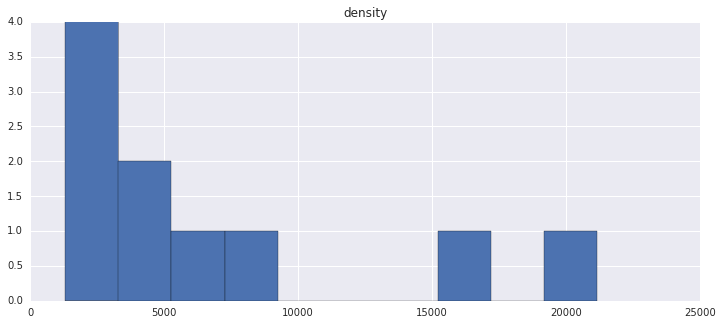

In [39]:
q9 = "SELECT cast (population as float)/cast (area_land as float) density  FROM facts where population !=(SELECT MAX(population) FROM facts) and population !=(SELECT MIN(population) FROM facts) ORDER BY density DESC;"
res9=pd.read_sql_query(q8, conn)
fig = plt.figure(figsize=(12, 5))
ax1=fig.add_subplot(1,1,1)
res8.hist(ax=ax1)
plt.show()

In [41]:
q10 = "SELECT cast(area_water as float)/cast(area_land as float) density  FROM facts where population !=(SELECT MAX(population) FROM facts) and population !=(SELECT MIN(population) FROM facts) ORDER BY density DESC LIMIT 10;"
res10=pd.read_sql_query(q10, conn)
res10

,density
0,4.520231
1,0.554791
2,0.386613
3,0.284673
4,0.259396
5,0.225710
6,0.222922
7,0.164356
8,0.156240
9,0.140509


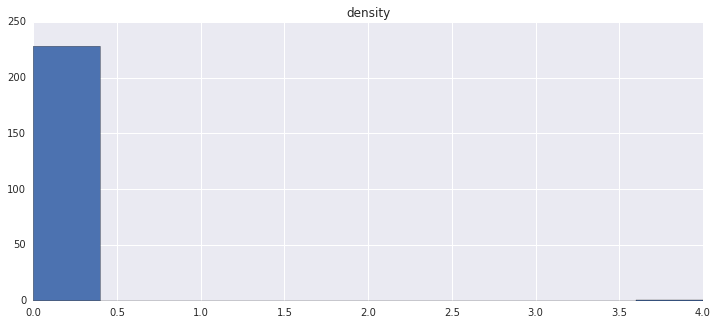

In [43]:
q10 = "SELECT area_water/area_land density  FROM facts where population !=(SELECT MAX(population) FROM facts) and population !=(SELECT MIN(population) FROM facts) ORDER BY density DESC;"
res10=pd.read_sql_query(q10, conn)
fig = plt.figure(figsize=(12, 5))
ax1=fig.add_subplot(1,1,1)
res10.hist(ax=ax1)
plt.show()

### Which countries have more water than land?

In [45]:
q10 = "SELECT name,cast(area_water as float)/cast(area_land as float) density  FROM facts where population !=(SELECT MAX(population) FROM facts) and population !=(SELECT MIN(population) FROM facts) and area_water>area_land ORDER BY density DESC LIMIT 10;"
res10=pd.read_sql_query(q10, conn)
res10

,name,density
0,Virgin Islands,4.520231


Virgin Islad is a country wich have more water than land